In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [5]:
from google.colab import files
 
 
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [6]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
## 3 points

## Assign the Outcome variable to y and the rest to X.

y = df.Outcome.to_numpy()
X = df[ df.columns[:-1] ].to_numpy()

 
## USe LogisticRegression to fit the data and print out the intercept and the coefficients

model = LogisticRegression(max_iter=10000).fit(X,y)

print(f"Intercept: {model.intercept_[0]}")

for i,c in enumerate(model.coef_[0]):
    print(f"coefficient {i+1}: {c}")


Intercept: -8.365744997014637
coefficient 1: 0.12236094725638227
coefficient 2: 0.035110569323652654
coefficient 3: -0.013296875187246886
coefficient 4: 0.000786285042868356
coefficient 5: -0.0011736606503952552
coefficient 6: 0.08967721631652409
coefficient 7: 0.8662797201091111
coefficient 8: 0.015006363400185423


In [8]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sigma=100)
    w1 = pm.Normal('w1', mu=0, sigma=100)
    w2 = pm.Normal('w2', mu=0, sigma=100)
    w3 = pm.Normal('w3', mu=0, sigma=100)
    w4 = pm.Normal('w4', mu=0, sigma=100)
    w5 = pm.Normal('w5', mu=0, sigma=100)
    w6 = pm.Normal('w6', mu=0, sigma=100)
    w7 = pm.Normal('w7', mu=0, sigma=100)
    w8 = pm.Normal('w8', mu=0, sigma=100)
   
    
    linreg = w0 * np.ones(df.shape[0]) + w1 * df.Pregnancies.values + w2 * df.Glucose.values \
    + w3 * df.BloodPressure.values + w4 * df.SkinThickness.values + w5 * df.Insulin.values + \
    w6 * df.BMI.values + w7 * df.DiabetesPedigreeFunction.values + w8 * df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=df.Outcome.values)

    
    map_est= pm.find_MAP()
    

The code defines a Bayesian logistic regression model. The model assumes that the outcome variable is binary, and that the probability of the outcome is related to a linear combination of the predictor variables.

The prior probabilities of the intercept and coefficients are Normal distributions with mean 0 and standard deviation of 100.

The likelihood distribution used is a Bernoulli distribution.

pm.invlogit(linreg) applies the inverse logit function to the linear predictor, which maps the linear predictor to a probability between 0 and 1.

map_est contains the MAP estimates of the coefficients.

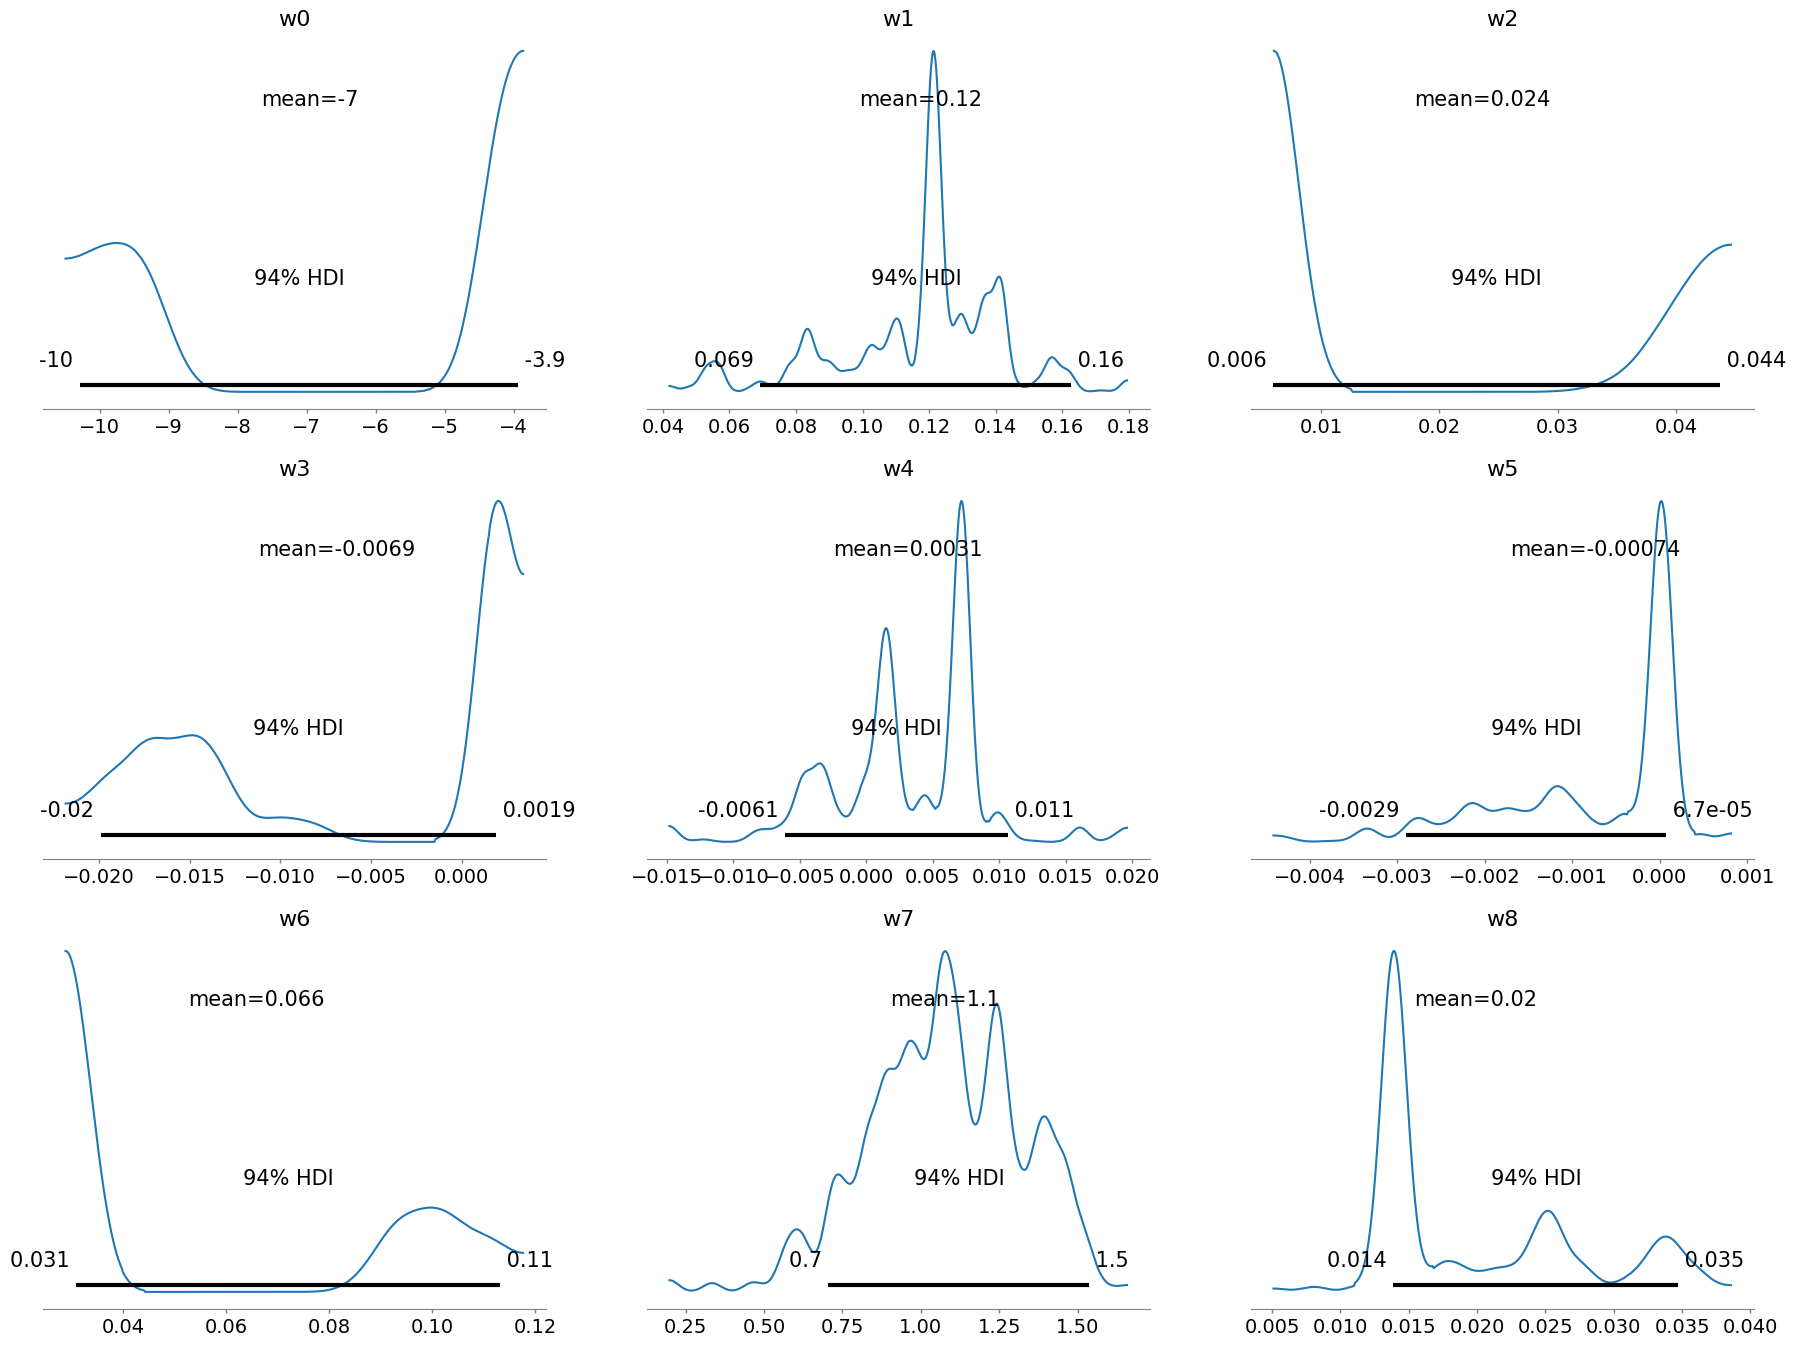

In [24]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
 
    trace = pm.sample( draws=400,  tune=2000, step=pm.Metropolis( ))
## Explain the output of the plot 
    az.plot_posterior(trace)

The plots represent the posterior distribution of each parameter.
<br>
The distributions do not look normal. The posterior plots show evidence of multimodal distributions. The MCMC algorithm may not have converged.
